In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
users = pd.read_csv('takehome_users.csv', encoding='latin-1')

In [3]:
engagement = pd.read_csv('takehome_user_engagement.csv')

# Take Home Assignment Description

### Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven ­day period , identify which factors predict future user adoption.

# Investigate `Users` and `Engagement` datasets

In [4]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


Two coluns are missing data: `last_session_creation_time` and `invited_by_user_id`.

In [6]:
users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [7]:
# fill empty invited by user ids with 0
users['invited_by_user_id'] = users['invited_by_user_id'].fillna(0).astype(int)

In [8]:
# check for duplicate users
user_duplicates = users.duplicated()
user_duplicates.sum()

0

In [9]:
# convert time columns to datetime objects
users['creation_time'] = pd.to_datetime(users['creation_time'])
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s')

In [10]:
users[['creation_time', 'last_session_creation_time']].describe()

,creation_time,last_session_creation_time
count,12000,8823
mean,2013-07-16 13:25:32.964499968,2013-09-15 21:08:25.700441856
min,2012-05-31 00:43:27,2012-05-31 08:20:06
25%,2013-01-15 21:28:22.750000128,2013-03-13 17:16:05
50%,2013-08-05 21:35:19.500000,2013-10-27 15:41:10
75%,2014-01-28 10:20:12.249999872,2014-04-25 16:16:44
max,2014-05-30 23:59:19,2014-06-06 14:58:50


We have data on users for just about 2 years. 

In [11]:
users['creation_source'].value_counts(normalize=True)

creation_source
ORG_INVITE            0.354500
GUEST_INVITE          0.180250
PERSONAL_PROJECTS     0.175917
SIGNUP                0.173917
SIGNUP_GOOGLE_AUTH    0.115417
Name: proportion, dtype: float64

The majority of users, 35%, had their account created via an organizational invitation. The least common creation source is through Google Authentication. 

In [12]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [13]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [14]:
# convert time_stamp column to datetime object
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'])

In [15]:
engagement.describe()

,time_stamp,user_id,visited
count,207917,207917.000000,207917.0
mean,2013-10-30 05:06:45.648763648,5913.314197,1.0
min,2012-05-31 08:20:06,1.000000,1.0
25%,2013-07-16 20:17:21,3087.000000,1.0
50%,2013-12-03 06:38:34,5682.000000,1.0
75%,2014-03-13 08:00:24,8944.000000,1.0
max,2014-06-06 14:58:50,12000.000000,1.0
std,NaN,3394.941674,0.0


The engagement table has data for 207,917 login attemps. 

I want to see how many users logged in more than once.

In [16]:
user_logings = engagement.groupby('user_id')['visited'].sum().sort_values(ascending=False).reset_index(name='login_count')
more_than_one = len(user_logings[user_logings['login_count'] > 1])
print(f'The number of users who have logged in more than once: {more_than_one}.\n \
This represents {round(more_than_one/len(users) * 100, 2)} % of the users base.')

The number of users who have logged in more than once: 2588.
 This represents 21.57 % of the users base.


In [17]:
users = users.rename(columns={'object_id':'user_id'})

# Identification of Adopted Users

In order to identify the users we will consider as "adopted" based on having logged in at least 3 times in a 7-day period, I will calculate the number of visits in a 7 day period grouped by user using the pandas `rolling` method. 

Before this, I want to convert the timestamp column into a datetime object without the time details. I will preserve a copy of the `time_stamp` column in case it is useful later. I will also create a new column that captures the hour at which a user logs in. 

Once the adopted users have been identified, I will create a new column, `adopted_user`, that will identify users as adopted with a 1 and not adopted with a 0. Once I have this feature, I will be able to do further analysis on what distinguishes an adopted user.

In [18]:
# create new column for hour of login attemp
engagement['login_hour'] = engagement['time_stamp'].dt.hour

# preserve a copy of the timestamp column
engagement['login_timestamp'] = engagement['time_stamp']

# extract date alone
engagement['time_stamp'] = engagement['time_stamp'].dt.date
engagement = engagement.rename(columns={'time_stamp':'login_date'})

# convert date to dateime to remove hourly details
engagement['login_date'] = pd.to_datetime(engagement['login_date'])
engagement.head()

,login_date,user_id,visited,login_hour,login_timestamp
0,2014-04-22,1,1,3,2014-04-22 03:53:30
1,2013-11-15,2,1,3,2013-11-15 03:45:04
2,2013-11-29,2,1,3,2013-11-29 03:45:04
3,2013-12-09,2,1,3,2013-12-09 03:45:04
4,2013-12-25,2,1,3,2013-12-25 03:45:04


In [19]:
# sort values by time_stamp column
engagement_sorted = engagement.sort_values('login_date')

# resample dataframe by day to identify if data is missing for any date in the range
engagement_resampled = engagement_sorted.set_index('login_date').resample('D').mean()

In [20]:
# check whether we are missing data for any day between 2012-05-31 and 2014-06-06
engagement_resampled[engagement_resampled['visited'].isna()]

,user_id,visited,login_hour,login_timestamp
login_date,,,,
2014-06-05,NaN,NaN,NaN,NaT


We are missing data for June 6th, potentially no users logged in that day.

In [21]:
# group engagement df by user_id
engagement_users = engagement_sorted.groupby('user_id')

# calculate rolling window by summing up number of visits in a 7-day period
engagement_users_rolling = engagement_users.rolling(window='7D', on='login_date')['visited'].count().reset_index(name='num_visits_7D')

In [22]:
engagement_users_rolling.sort_values('num_visits_7D', ascending=False).head()

,user_id,login_date,num_visits_7D
103958,5682,2014-04-22,7.0
132191,7572,2013-09-23,7.0
202311,11573,2014-06-04,7.0
132189,7572,2013-09-21,7.0
132188,7572,2013-09-20,7.0


In [23]:
engagement_7d = engagement_users_rolling['num_visits_7D'].value_counts().reset_index(name='count')
engagement_7d.sort_values('num_visits_7D')

,num_visits_7D,count
6,1.0,23441
5,2.0,23954
3,3.0,27754
1,4.0,29276
2,5.0,28884
4,6.0,27425
0,7.0,47183


In [24]:
adopted_users = engagement_users_rolling[engagement_users_rolling['num_visits_7D'] > 3]
num_adopted_users = adopted_users['user_id'].nunique()
perc_adopted = round(num_adopted_users / len(users) * 100)

print(f'There are {num_adopted_users} users who meet the requirments of being an adoped user.')
print(f'This represents {perc_adopted} % of all users.')

There are 1297 users who meet the requirments of being an adoped user.
This represents 11 % of all users.


In [25]:
adopted_users_list = adopted_users['user_id'].unique()

In [26]:
# add new column to users table to identify whether a user is considered an adopted user
users['adopted_user'] = np.where(users['user_id'].isin(adopted_users_list), 1, 0)

# verify that the number of adopted users is correct
users['adopted_user'].value_counts()

# add new column to users table to identify whether a user was invited by an adopted user
users['invited_by_adopted_user'] = np.where(users['invited_by_user_id'].isin(adopted_users_list), 1, 0)

In [27]:
# add new column to users table to identify whether a user is considered an adopted user
engagement['adopted_user'] = np.where(engagement['user_id'].isin(adopted_users_list), 1, 0)

# verify that the number of adopted users is correct
engagement['adopted_user'].value_counts(normalize=True)

adopted_user
1    0.934931
0    0.065069
Name: proportion, dtype: float64

In [28]:
engagement

,login_date,user_id,visited,login_hour,login_timestamp,adopted_user
0,2014-04-22,1,1,3,2014-04-22 03:53:30,0
1,2013-11-15,2,1,3,2013-11-15 03:45:04,0
2,2013-11-29,2,1,3,2013-11-29 03:45:04,0
3,2013-12-09,2,1,3,2013-12-09 03:45:04,0
4,2013-12-25,2,1,3,2013-12-25 03:45:04,0
...,...,...,...,...,...,...
207912,2013-09-06,11996,1,6,2013-09-06 06:14:15,0
207913,2013-01-15,11997,1,18,2013-01-15 18:28:37,0
207914,2014-04-27,11998,1,12,2014-04-27 12:45:16,0
207915,2012-06-02,11999,1,11,2012-06-02 11:55:59,0


Although adopted users only account for 11% of the user base, they account of 93% of the total user engagement. 

In [29]:
user_creation_source = users.groupby('creation_source').agg(
    count=('adopted_user', 'sum'),
    total=('adopted_user', 'count')
)
user_creation_source['perc_adopted'] = round(user_creation_source['count'] / user_creation_source['total'] * 100, 2)

user_creation_source

,count,total,perc_adopted
creation_source,,,
GUEST_INVITE,296,2163,13.68
ORG_INVITE,445,4254,10.46
PERSONAL_PROJECTS,127,2111,6.02
SIGNUP,246,2087,11.79
SIGNUP_GOOGLE_AUTH,183,1385,13.21


The highest volume of adopted users were invited by an organization or group. Of users being invted by a guest invite or google sign up, they have nearly identical percentages of adopted users (13%). 

In [30]:
users['org_id'].nunique()

417

In [31]:
total_adopted_users = len(users[users['adopted_user'] == 1])
total_non_adopted_users = len(users[users['adopted_user'] == 0])

print(f'The total number of adopted users is {total_adopted_users} and the total number of non-adopted users is {total_non_adopted_users}.')

The total number of adopted users is 1297 and the total number of non-adopted users is 10703.


In [32]:
users_by_adoption = users.groupby('adopted_user')['adopted_user'].size().reset_index(name='total_users')
users_by_adoption

,adopted_user,total_users
0,0,10703
1,1,1297


# Feature Engineering

**`org_id`**: There are over 417 organizations users are associated with. In order to make this column useful for modeling, I will create bins based on the size of membership and create a new column to categorize each user based on the bin size. I will later remove `org_id` from the users table.

**`email`**: The email string could provide information based on the email provider. I will identify the most common providers, set a cutoff, and categorize all other providers as "Other". I will later remove `email` from the users table. 

**`creation_time`**: This time-based column could provide some useful information about users, such as the year, month, day of week, hour and minute the account was created and how that might influence future user behavior. I will create new time-based columns for `creation_year`, `creation_month`, `creation_dow`, `creation_hour`, and `creation_minute`. I will also visualize any difference bewteen user groups and these new time-based features.

In [33]:
users.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,invited_by_adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,0,1


In [34]:
# identify distribution of org_id size
org_counts = users['org_id'].value_counts().reset_index(name='count')
org_counts.sort_values('count', ascending=False)

,org_id,count
0,0,319
1,1,233
2,2,201
3,3,168
4,4,159
...,...,...
412,396,9
413,397,8
414,400,8
415,386,7


In [35]:
# create a new column for org size based on bins 
bins = [0, 10, 50, 100, 150, np.inf]
labels = ['0-9', '10-49', '50-99', '100-149', '150+']

org_counts['org_size'] = pd.cut(org_counts['count'], bins=bins, labels=labels)
org_counts

,org_id,count,org_size
0,0,319,150+
1,1,233,150+
2,2,201,150+
3,3,168,150+
4,4,159,150+
...,...,...,...
412,396,9,0-9
413,397,8,0-9
414,400,8,0-9
415,386,7,0-9


In [36]:
users = users.merge(org_counts[['org_id', 'org_size']], on='org_id', how='left')
users.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,invited_by_adopted_user,org_size
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,0,0,50-99
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,0,0,150+
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,0,1,10-49
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,0,1,150+
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,0,1,10-49


In [37]:
# extract email provider
users['email_provider'] = users['email'].apply(lambda x: x.split('@')[1].split('.')[0])
email_providers = users['email_provider'].value_counts().reset_index(name='count')
email_providers.sort_values('count', ascending=False).head(10)

,email_provider,count
0,gmail,3562
1,yahoo,2447
2,jourrapide,1259
3,cuvox,1202
4,gustr,1179
5,hotmail,1165
10,mumdc,2
13,luque,2
12,xvnbr,2
11,xybhi,2


In [38]:
common_email_providers = email_providers[email_providers['count'] > 2]['email_provider'].tolist()
users['email_provider'] = users['email_provider'].apply(
    lambda x: x if x in common_email_providers else 'other')
users['email_provider'].value_counts()

email_provider
gmail         3562
yahoo         2447
jourrapide    1259
cuvox         1202
other         1186
gustr         1179
hotmail       1165
Name: count, dtype: int64

In [39]:
users['creation_month'] = users['creation_time'].dt.month
users['creation_dow']= users['creation_time'].dt.day_of_week
users['creation_year']= users['creation_time'].dt.year
users['creation_hour']= users['creation_time'].dt.hour
users['creation_minute']= users['creation_time'].dt.minute

In [40]:
monthly_creation = users.groupby(['creation_month', 'adopted_user']).size().reset_index(name='count')
monthly_creation = monthly_creation.merge(users_by_adoption, on='adopted_user', how='left')
monthly_creation['perc_of_users_by_adoption_type'] = round(monthly_creation['count'] / monthly_creation['total_users'] * 100, 2)
monthly_creation.head()

,creation_month,adopted_user,count,total_users,perc_of_users_by_adoption_type
0,1,0,915,10703,8.55
1,1,1,114,1297,8.79
2,2,0,832,10703,7.77
3,2,1,102,1297,7.86
4,3,0,1076,10703,10.05


Text(0, 0.5, 'Count of users')

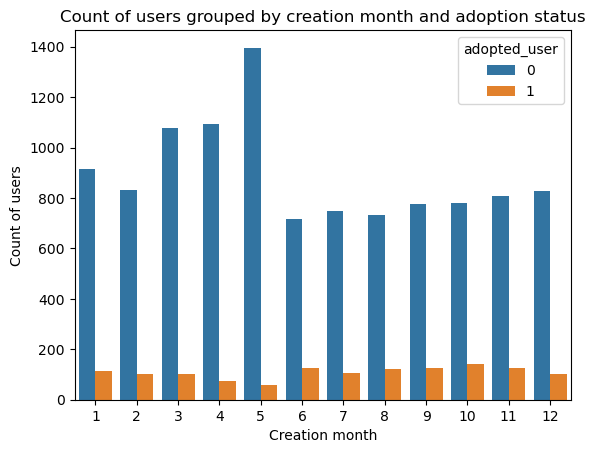

In [41]:
fig, ax = plt.subplots()
sns.barplot(data=monthly_creation, x='creation_month', y='count', hue='adopted_user')
ax.set_title('Count of users grouped by creation month and adoption status')
ax.set_xlabel('Creation month')
ax.set_ylabel('Count of users')

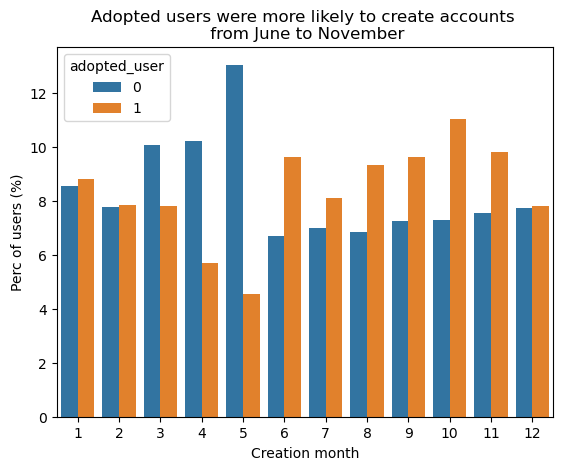

In [42]:
fig, ax = plt.subplots()
sns.barplot(data=monthly_creation, x='creation_month', y='perc_of_users_by_adoption_type', hue='adopted_user')
ax.set_title('Adopted users were more likely to create accounts \n from June to November')
ax.set_xlabel('Creation month')
ax.set_ylabel('Perc of users (%)')
plt.show()

In [43]:
def calc_prevalence(y):
 return (sum(y)/len(y))

<Axes: xlabel='creation_month'>

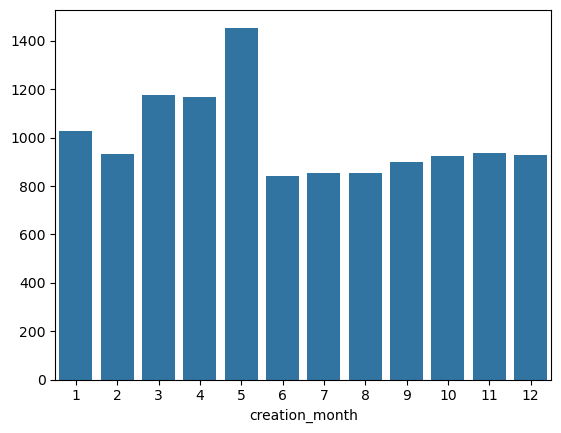

In [44]:
sns.barplot(users.groupby(['creation_month']).size())

<Axes: xlabel='creation_dow'>

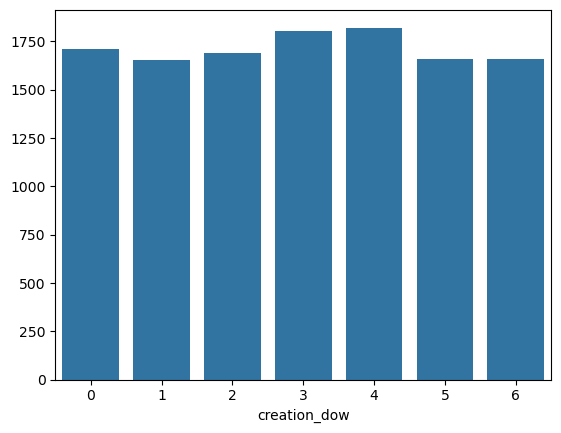

In [45]:
sns.barplot(users.groupby('creation_dow').size())

In [46]:
dow_creation = users.groupby(['creation_dow', 'adopted_user']).size().reset_index(name='count')
dow_creation = dow_creation.merge(users_by_adoption, on='adopted_user', how='left')
dow_creation['perc_of_users_by_adoption_type'] = round(dow_creation['count'] / dow_creation['total_users'] * 100, 2)
dow_creation.head()

,creation_dow,adopted_user,count,total_users,perc_of_users_by_adoption_type
0,0,0,1533,10703,14.32
1,0,1,179,1297,13.80
2,1,0,1474,10703,13.77
3,1,1,182,1297,14.03
4,2,0,1498,10703,14.00


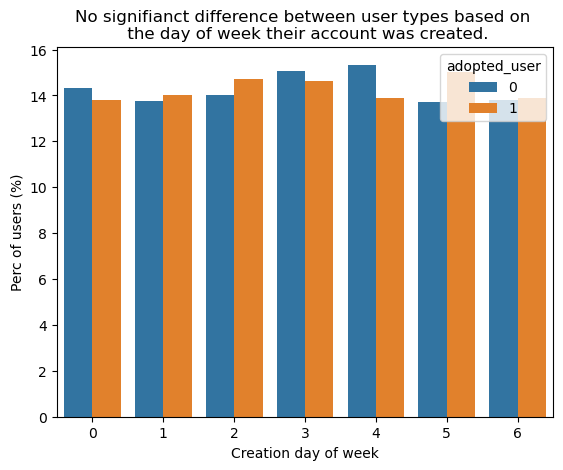

In [47]:
fig, ax = plt.subplots()
sns.barplot(data=dow_creation, x='creation_dow', y='perc_of_users_by_adoption_type', hue='adopted_user')
ax.set_title('No signifianct difference between user types based on \n the day of week their account was created.')
ax.set_xlabel('Creation day of week')
ax.set_ylabel('Perc of users (%)')
plt.show()

<Axes: xlabel='creation_hour'>

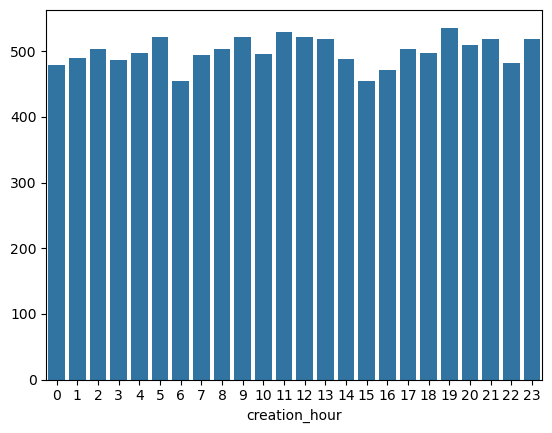

In [48]:
sns.barplot(users.groupby('creation_hour').size())

In [49]:
hour_creation = users.groupby(['creation_hour', 'adopted_user']).size().reset_index(name='count')
hour_creation = hour_creation.merge(users_by_adoption, on='adopted_user', how='left')
hour_creation['perc_of_users_by_adoption_type'] = round(hour_creation['count'] / hour_creation['total_users'] * 100, 2)

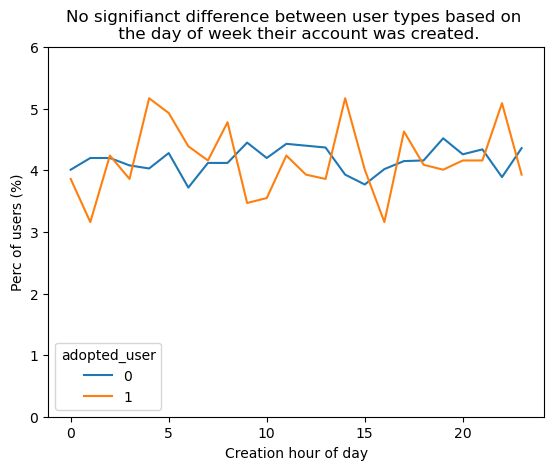

In [50]:
fig, ax = plt.subplots()
sns.lineplot(data=hour_creation, x='creation_hour', y='perc_of_users_by_adoption_type', hue='adopted_user')
ax.set_title('No signifianct difference between user types based on \n the day of week their account was created.')
ax.set_xlabel('Creation hour of day')
ax.set_ylabel('Perc of users (%)')
ax.set_ylim([0, 6])
plt.show()

In [51]:
year_creation = users.groupby(['creation_year', 'adopted_user']).size().reset_index(name='count')
year_creation = year_creation.merge(users_by_adoption, on='adopted_user', how='left')
year_creation['perc_of_users_by_adoption_type'] = round(year_creation['count'] / year_creation['total_users'] * 100, 2)
year_creation

,creation_year,adopted_user,count,total_users,perc_of_users_by_adoption_type
0,2012,0,2404,10703,22.46
1,2012,1,393,1297,30.30
2,2013,0,4942,10703,46.17
3,2013,1,734,1297,56.59
4,2014,0,3357,10703,31.37
5,2014,1,170,1297,13.11


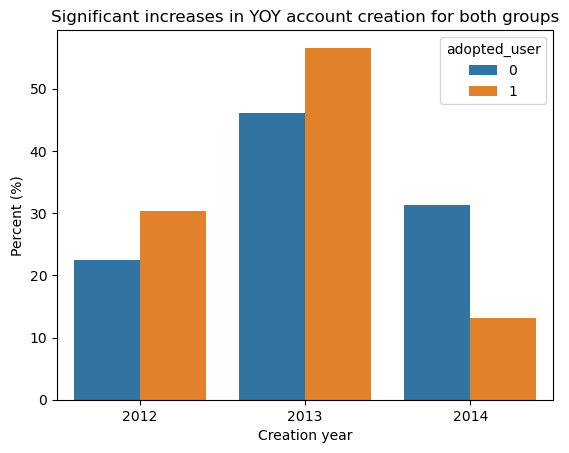

In [52]:
fig, ax = plt.subplots()
sns.barplot(data=year_creation, x='creation_year', y='perc_of_users_by_adoption_type', hue='adopted_user')
ax.set_title('Significant increases in YOY account creation for both groups')
ax.set_xlabel('Creation year')
ax.set_ylabel('Percent (%)')
plt.show()

In [53]:
users.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,invited_by_adopted_user,org_size,email_provider,creation_month,creation_dow,creation_year,creation_hour,creation_minute
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,0,0,50-99,yahoo,4,1,2014,3,53
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,0,0,150+,gustr,11,4,2013,3,45
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,0,1,10-49,gustr,3,1,2013,23,14
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,0,1,150+,yahoo,5,1,2013,8,9
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,0,1,10-49,yahoo,1,3,2013,10,14


In [54]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          12000 non-null  int64         
 10  adopted_user                12000 non-null  int64         
 11  invited_by_adopted_user     12000 non-null  int64     

## Creating cutoff time for time-based calculated fields

The cutoff point will ensure that new features like `total_visits`, `days_since_last_session` and `avg_time_bw_sessions` are calculated based on past data for each user relative to their creation time. This prevent the use of future engagement data to predict user behavior. I will be using a cutoff date of 60 days after a user creates their account. 

The engagement dataset will then be filtered based on the cutoff date to exclude future engagement data. This is to prevent data leakage during modeling to make sure the model is only using data before the "adoption" event. 

In [55]:
users['cutoff_time'] = users['creation_time'] + pd.Timedelta(days=60)
users

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,invited_by_adopted_user,org_size,email_provider,creation_month,creation_dow,creation_year,creation_hour,creation_minute,cutoff_time
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,0,0,50-99,yahoo,4,1,2014,3,53,2014-06-21 03:53:30
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,0,0,150+,gustr,11,4,2013,3,45,2014-01-14 03:45:04
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,0,1,10-49,gustr,3,1,2013,23,14,2013-05-18 23:14:52
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,0,1,150+,yahoo,5,1,2013,8,9,2013-07-20 08:09:28
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,0,1,10-49,yahoo,1,3,2013,10,14,2013-03-18 10:14:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263,0,0,10-49,gustr,9,4,2013,6,14,2013-11-05 06:14:15
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,0,0,0,10-49,gmail,1,3,2013,18,28,2013-03-11 18:28:37
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074,0,0,10-49,cuvox,4,6,2014,12,45,2014-06-26 12:45:16
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,0,0,0,100-149,other,5,3,2012,11,55,2012-07-30 11:55:59


In [56]:
engagement_sorted = engagement_sorted.merge(users, on='user_id', how='left')

In [57]:
# filter engagement data by cutoff time for each user
engagement_filtered = engagement_sorted[engagement_sorted['login_timestamp'] < engagement_sorted['cutoff_time']]
engagement_filtered

,login_date,user_id,visited,login_hour,login_timestamp,creation_time,name,email,creation_source,last_session_creation_time,...,adopted_user,invited_by_adopted_user,org_size,email_provider,creation_month,creation_dow,creation_year,creation_hour,creation_minute,cutoff_time
0,2012-05-31,1693,1,21,2012-05-31 21:58:33,2012-05-31 21:58:33,Faulkner Hayden,HaydenFaulkner@gmail.com,SIGNUP_GOOGLE_AUTH,2014-05-12 21:58:33,...,1,0,10-49,gmail,5,3,2012,21,58,2012-07-30 21:58:33
1,2012-05-31,3428,1,15,2012-05-31 15:47:36,2012-05-31 15:47:36,Spears Arthur,ArthurJSpears@gmail.com,SIGNUP_GOOGLE_AUTH,2012-11-13 15:47:36,...,0,0,10-49,gmail,5,3,2012,15,47,2012-07-30 15:47:36
2,2012-05-31,10012,1,8,2012-05-31 08:20:06,2012-05-31 08:20:06,Spikes Danille,DanilleJSpikes@hotmail.com,ORG_INVITE,2012-05-31 08:20:06,...,0,1,10-49,hotmail,5,3,2012,8,20,2012-07-30 08:20:06
3,2012-05-31,9899,1,17,2012-05-31 17:19:37,2012-05-31 17:19:37,Jørgensen Sofie,SofieNJrgensen@yahoo.com,ORG_INVITE,2012-05-31 17:19:37,...,0,0,10-49,yahoo,5,3,2012,17,19,2012-07-30 17:19:37
4,2012-06-01,10163,1,14,2012-06-01 14:30:38,2012-05-31 14:30:38,Olesen Alexander,AlexanderLOlesen@gustr.com,PERSONAL_PROJECTS,2012-06-01 14:30:38,...,0,0,10-49,gustr,5,3,2012,14,30,2012-07-30 14:30:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207874,2014-06-04,627,1,16,2014-06-04 16:08:31,2014-04-16 16:08:31,Denny Jeanette,JeanetteRDenny@hotmail.com,GUEST_INVITE,2014-06-04 16:08:31,...,1,0,10-49,hotmail,4,2,2014,16,8,2014-06-15 16:08:31
207885,2014-06-04,6299,1,0,2014-06-04 00:02:31,2014-05-29 00:02:31,Pritchard Lola,LolaPritchard@gmail.com,SIGNUP,2014-06-04 00:02:31,...,0,0,100-149,gmail,5,3,2014,0,2,2014-07-28 00:02:31
207900,2014-06-04,10274,1,3,2014-06-04 03:20:45,2014-04-09 03:20:45,Olsen Tobias,qoultlwe@fmuqr.com,GUEST_INVITE,2014-06-04 03:20:45,...,0,0,10-49,other,4,2,2014,3,20,2014-06-08 03:20:45
207912,2014-06-04,3869,1,21,2014-06-04 21:08:01,2014-05-18 21:08:01,Nagel Florian,FlorianNagel@yahoo.com,GUEST_INVITE,2014-06-04 21:08:01,...,0,0,10-49,yahoo,5,6,2014,21,8,2014-07-17 21:08:01


In [58]:
# find the second to last session for each user
engagement_last_sessions = engagement_filtered.sort_values(['user_id', 'login_timestamp'])
engagement_last_sessions['previous_login'] = engagement_last_sessions.groupby('user_id')['login_timestamp'].shift(1)
most_recent_sessions = engagement_last_sessions.groupby('user_id').tail(1)

# add the second to last session to the users dataframe
users_merged = users.merge(most_recent_sessions[['user_id', 'login_timestamp', 'previous_login']], on='user_id', how='left')

# calculate days since last session by subtracting the second to last session from the last session
users_merged['days_since_last_session'] = (users_merged['login_timestamp'] - users_merged['previous_login']).dt.days

In [59]:
users_merged.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,...,email_provider,creation_month,creation_dow,creation_year,creation_hour,creation_minute,cutoff_time,login_timestamp,previous_login,days_since_last_session
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,...,yahoo,4,1,2014,3,53,2014-06-21 03:53:30,2014-04-22 03:53:30,NaT,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,...,gustr,11,4,2013,3,45,2014-01-14 03:45:04,2014-01-08 03:45:04,2013-12-31 03:45:04,8.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,...,gustr,3,1,2013,23,14,2013-05-18 23:14:52,2013-03-19 23:14:52,NaT,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,...,yahoo,5,1,2013,8,9,2013-07-20 08:09:28,2013-05-22 08:09:28,NaT,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,...,yahoo,1,3,2013,10,14,2013-03-18 10:14:20,2013-01-22 10:14:20,NaT,NaN


In [60]:
# calculate average time between session for each user
engagement_last_sessions['time_between_sessions'] = (engagement_last_sessions['login_timestamp'] - engagement_last_sessions['previous_login']).dt.days
avg_time_bw_sessions = engagement_last_sessions.groupby('user_id')['time_between_sessions'].mean().reset_index(name='avg_time_bw_sessions')
users_merged = users_merged.merge(avg_time_bw_sessions[['user_id', 'avg_time_bw_sessions']], on='user_id', how='left')
users_merged.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,...,creation_month,creation_dow,creation_year,creation_hour,creation_minute,cutoff_time,login_timestamp,previous_login,days_since_last_session,avg_time_bw_sessions
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,...,4,1,2014,3,53,2014-06-21 03:53:30,2014-04-22 03:53:30,NaT,NaN,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,...,11,4,2013,3,45,2014-01-14 03:45:04,2014-01-08 03:45:04,2013-12-31 03:45:04,8.0,10.8
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,...,3,1,2013,23,14,2013-05-18 23:14:52,2013-03-19 23:14:52,NaT,NaN,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,...,5,1,2013,8,9,2013-07-20 08:09:28,2013-05-22 08:09:28,NaT,NaN,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,...,1,3,2013,10,14,2013-03-18 10:14:20,2013-01-22 10:14:20,NaT,NaN,NaN


In [61]:
total_sessions = engagement_filtered.groupby('user_id')['login_timestamp'].nunique().reset_index(name='total_visits')
users_merged = users_merged.merge(total_sessions, on='user_id', how='left')
users_merged.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,...,creation_dow,creation_year,creation_hour,creation_minute,cutoff_time,login_timestamp,previous_login,days_since_last_session,avg_time_bw_sessions,total_visits
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,...,1,2014,3,53,2014-06-21 03:53:30,2014-04-22 03:53:30,NaT,NaN,NaN,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,...,4,2013,3,45,2014-01-14 03:45:04,2014-01-08 03:45:04,2013-12-31 03:45:04,8.0,10.8,6.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,...,1,2013,23,14,2013-05-18 23:14:52,2013-03-19 23:14:52,NaT,NaN,NaN,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,...,1,2013,8,9,2013-07-20 08:09:28,2013-05-22 08:09:28,NaT,NaN,NaN,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,...,3,2013,10,14,2013-03-18 10:14:20,2013-01-22 10:14:20,NaT,NaN,NaN,1.0


In [62]:
# handle missing values for users who only logged in once
users_merged['total_visits'] = users_merged['total_visits'].fillna(1)
users_merged['days_since_last_session'] = users_merged['days_since_last_session'].fillna(-1)
users_merged['avg_time_bw_sessions'] = round(users_merged['avg_time_bw_sessions'], 2).fillna(-1)
users_clean = users_merged.drop(columns=['login_timestamp', 'previous_login'])
users_clean.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,...,email_provider,creation_month,creation_dow,creation_year,creation_hour,creation_minute,cutoff_time,days_since_last_session,avg_time_bw_sessions,total_visits
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,...,yahoo,4,1,2014,3,53,2014-06-21 03:53:30,-1.0,-1.0,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,...,gustr,11,4,2013,3,45,2014-01-14 03:45:04,8.0,10.8,6.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,...,gustr,3,1,2013,23,14,2013-05-18 23:14:52,-1.0,-1.0,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,...,yahoo,5,1,2013,8,9,2013-07-20 08:09:28,-1.0,-1.0,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,...,yahoo,1,3,2013,10,14,2013-03-18 10:14:20,-1.0,-1.0,1.0


In [63]:
users_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          12000 non-null  int64         
 10  adopted_user                12000 non-null  int64         
 11  invited_by_adopted_user     12000 non-null  int64     

# Preprocessing


In [64]:
# drop columns
users_processed = users_clean.drop(columns=['user_id', 'name', 'email', 'last_session_creation_time', 'org_id', 'invited_by_user_id', 'cutoff_time'])
users_processed = users_processed.set_index('creation_time')
users_processed.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,invited_by_adopted_user,org_size,email_provider,creation_month,creation_dow,creation_year,creation_hour,creation_minute,days_since_last_session,avg_time_bw_sessions,total_visits
creation_time,,,,,,,,,,,,,,,
2014-04-22 03:53:30,GUEST_INVITE,1,0,0,0,50-99,yahoo,4,1,2014,3,53,-1.0,-1.0,1.0
2013-11-15 03:45:04,ORG_INVITE,0,0,0,0,150+,gustr,11,4,2013,3,45,8.0,10.8,6.0
2013-03-19 23:14:52,ORG_INVITE,0,0,0,1,10-49,gustr,3,1,2013,23,14,-1.0,-1.0,1.0
2013-05-21 08:09:28,GUEST_INVITE,0,0,0,1,150+,yahoo,5,1,2013,8,9,-1.0,-1.0,1.0
2013-01-17 10:14:20,GUEST_INVITE,0,0,0,1,10-49,yahoo,1,3,2013,10,14,-1.0,-1.0,1.0


In [65]:
# check for missing data
users_processed.isna().sum()

creation_source               0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
adopted_user                  0
invited_by_adopted_user       0
org_size                      0
email_provider                0
creation_month                0
creation_dow                  0
creation_year                 0
creation_hour                 0
creation_minute               0
days_since_last_session       0
avg_time_bw_sessions          0
total_visits                  0
dtype: int64

In [66]:
# encode categorical variables
users_encoded = pd.get_dummies(users_processed, drop_first=True, dtype=int)

In [67]:
pd.set_option('display.max_columns', None)

In [68]:
users_encoded = users_encoded.astype(int)
users_encoded

,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,invited_by_adopted_user,creation_month,creation_dow,creation_year,creation_hour,creation_minute,days_since_last_session,avg_time_bw_sessions,total_visits,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,org_size_10-49,org_size_50-99,org_size_100-149,org_size_150+,email_provider_gmail,email_provider_gustr,email_provider_hotmail,email_provider_jourrapide,email_provider_other,email_provider_yahoo
creation_time,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-04-22 03:53:30,1,0,0,0,4,1,2014,3,53,-1,-1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2013-11-15 03:45:04,0,0,0,0,11,4,2013,3,45,8,10,6,1,0,0,0,0,0,0,1,0,1,0,0,0,0
2013-03-19 23:14:52,0,0,0,1,3,1,2013,23,14,-1,-1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0
2013-05-21 08:09:28,0,0,0,1,5,1,2013,8,9,-1,-1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2013-01-17 10:14:20,0,0,0,1,1,3,2013,10,14,-1,-1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-09-06 06:14:15,0,0,0,0,9,4,2013,6,14,-1,-1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0
2013-01-10 18:28:37,0,0,0,0,1,3,2013,18,28,-1,-1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0
2014-04-27 12:45:16,1,1,0,0,4,6,2014,12,45,-1,-1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


# Modeling
The goal is **to predict whether a user will be adopted**. 

**Metrics**: Several evaluation techniques will be used to evaluate model performance. Since this is a binary classification problem, I will look at accuracy, precision, and recall. The data has a class imbalance, where only 11% of the data belong to the positive class (`adopted_user` == 1). Due to the class imbalance, focusing on accuracy alone could be misleading, as a high accuracy could still result from poor identification of the minority class (adopted users). 

The primary goal is to capture as many adopted users as possible, meaning I want to minimize false negatives. For this reason, I will prioritize recall (the proportion of actual adopted users that are correctly identified). I am assuming that false positives (incorrectly classifying a non-adopted user as adopted) are not particularly costly for the organization, so I am willing to sacrifice precision to maximize recall.

**Train/Test Split**: Since this is a time-based problem involving user engagement over time, a random train-test split could lead to training the model on future data and testing it on past data, which would not be realistic for real-world use cases. Therefore, I have implemented a time-based train-test split to ensure that the model is trained on users' past data and evaluated on future user behavior. The data has been sorted by the user account creation date, and the train-test split is based on this chronological order.

**Model Types**: Since most of the features in the dataset are categorical, I have chosen to use tree-based models, such as Random Forest and Gradient Boosting, which naturally handle categorical variables without the need for feature scaling. These models are also well-suited for handling imbalanced datasets and provide feature importance insights, which will help in understanding which factors contribute the most to user adoption.


In [69]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_recall_curve, average_precision_score, precision_recall_fscore_support
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE


In [70]:
users_sorted = users_encoded.sort_index()
users_sorted

,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,invited_by_adopted_user,creation_month,creation_dow,creation_year,creation_hour,creation_minute,days_since_last_session,avg_time_bw_sessions,total_visits,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,org_size_10-49,org_size_50-99,org_size_100-149,org_size_150+,email_provider_gmail,email_provider_gustr,email_provider_hotmail,email_provider_jourrapide,email_provider_other,email_provider_yahoo
creation_time,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-05-31 00:43:27,0,0,0,0,5,3,2012,0,43,-1,-1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1
2012-05-31 01:42:31,0,0,0,1,5,3,2012,1,42,-1,-1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2012-05-31 06:23:51,0,0,0,0,5,3,2012,6,23,14,14,4,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2012-05-31 08:20:06,0,1,0,1,5,3,2012,8,20,-1,-1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2012-05-31 11:55:59,0,0,0,0,5,3,2012,11,55,-1,-1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-30 23:10:35,0,0,0,0,5,4,2014,23,10,-1,-1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2014-05-30 23:12:01,0,0,0,0,5,4,2014,23,12,-1,-1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2014-05-30 23:27:30,0,0,0,0,5,4,2014,23,27,-1,-1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [71]:
train_size = int(0.7 * len(users_sorted))
train_data = users_sorted.iloc[:train_size]
test_data = users_sorted.iloc[train_size:]

X_train = train_data.drop(columns='adopted_user')
y_train = train_data['adopted_user']

X_test = test_data.drop(columns='adopted_user')
y_test = test_data['adopted_user']

In [72]:
print(f'Training set shape: X is {X_train.shape} and y is {y_train.shape}.')
print(f'Testing set shape: X is {X_test.shape} and y is {y_test.shape}.')

Training set shape: X is (8400, 25) and y is (8400,).
Testing set shape: X is (3600, 25) and y is (3600,).


In [73]:
print(calc_prevalence(y_train))
print(calc_prevalence(y_test))

0.1332142857142857
0.049444444444444444


In [74]:
model = RandomForestClassifier(random_state=40)
model_fit = model.fit(X_train, y_train)

y_pred = model_fit.predict(X_test)
y_pred_proba = model_fit.predict_proba(X_test)[:, 1]

y_pred_train = model_fit.predict(X_train)
y_pred_proba_train = model_fit.predict_proba(X_train)[:, 1]

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

model_important_features = pd.DataFrame(model_fit.feature_importances_,
                                     columns=['feature_importance'],
                                     index=X_test.columns)
model_important_features = model_important_features.sort_values('feature_importance', ascending=False)

print('Confusion Matrix Results: \n', conf_matrix)
print()
print('Classification Report: \n', class_report)
print()
print(model_important_features.head(10))

Confusion Matrix Results: 
 [[3245  177]
 [  19  159]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      3422
           1       0.47      0.89      0.62       178

    accuracy                           0.95      3600
   macro avg       0.73      0.92      0.79      3600
weighted avg       0.97      0.95      0.95      3600


                            feature_importance
total_visits                          0.321230
avg_time_bw_sessions                  0.238297
days_since_last_session               0.210685
creation_minute                       0.043254
creation_hour                         0.039009
creation_month                        0.032354
creation_dow                          0.026888
creation_year                         0.008538
creation_source_ORG_INVITE            0.007533
opted_in_to_mailing_list              0.006884


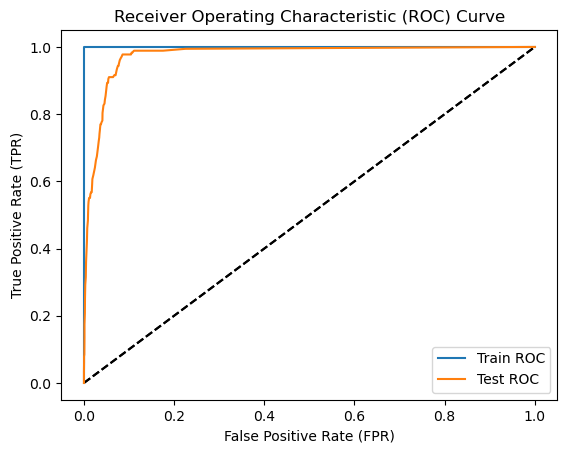

In [75]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_proba_train)
plt.plot([0,1], [0, 1], 'k--')
plt.plot(fpr_train, tpr_train, label='Train ROC')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Test ROC')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

plt.show()


In [76]:
print(roc_auc_score(y_test, y_pred_proba))

0.9748602893373347


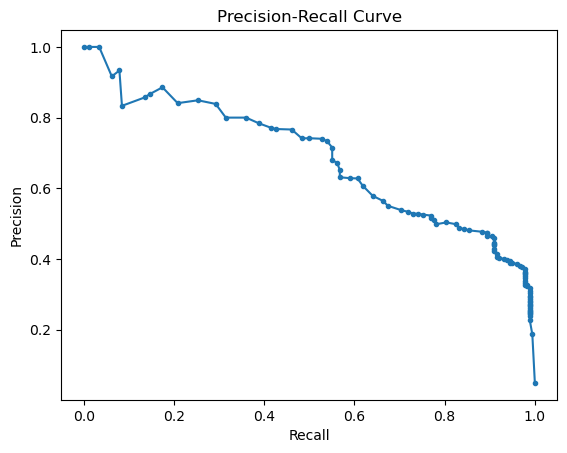

In [77]:
# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot the Precision-Recall Curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [78]:
auprc = average_precision_score(y_test, y_pred_proba)
print(f"Area Under Precision-Recall Curve (AUPRC): {auprc}")

Area Under Precision-Recall Curve (AUPRC): 0.6806011096409932


### Gradient Boosting Classifier

In [79]:
model = GradientBoostingClassifier(random_state=40)
model_fit = model.fit(X_train, y_train)

y_pred = model_fit.predict(X_test)
y_pred_proba = model_fit.predict_proba(X_test)[:, 1]

y_pred_train = model_fit.predict(X_train)
y_pred_proba_train = model_fit.predict_proba(X_train)[:, 1]

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

model_important_features = pd.DataFrame(model_fit.feature_importances_,
                                     columns=['feature_importance'],
                                     index=X_test.columns)
model_important_features = model_important_features.sort_values('feature_importance', ascending=False)

print('Confusion Matrix Results: \n', conf_matrix)
print()
print('Classification Report: \n', class_report)
print()
print(model_important_features.head(10))

Confusion Matrix Results: 
 [[3232  190]
 [  22  156]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.94      0.97      3422
           1       0.45      0.88      0.60       178

    accuracy                           0.94      3600
   macro avg       0.72      0.91      0.78      3600
weighted avg       0.97      0.94      0.95      3600


                                   feature_importance
total_visits                                 0.853800
avg_time_bw_sessions                         0.099390
days_since_last_session                      0.015385
creation_month                               0.009917
creation_hour                                0.005982
creation_minute                              0.005279
creation_dow                                 0.001955
creation_source_ORG_INVITE                   0.001516
creation_source_PERSONAL_PROJECTS            0.001095
opted_in_to_mailing_list                     0.0010

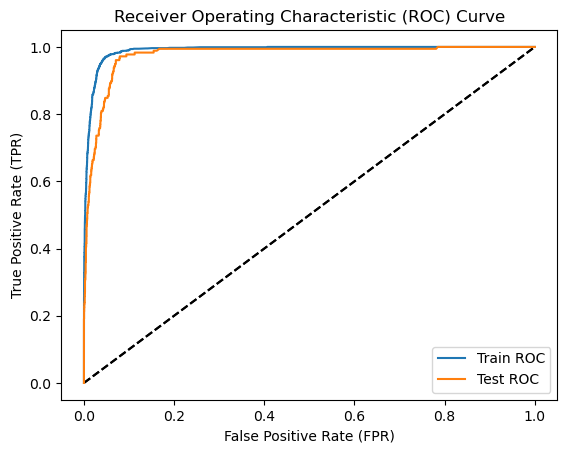

In [80]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_proba_train)
plt.plot([0,1], [0, 1], 'k--')
plt.plot(fpr_train, tpr_train, label='Train ROC')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Test ROC')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

plt.show()

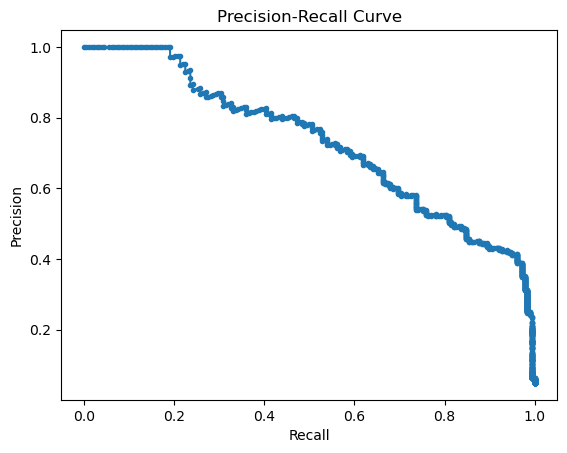

In [81]:
# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot the Precision-Recall Curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [82]:
auprc = average_precision_score(y_test, y_pred_proba)
print(f"Area Under Precision-Recall Curve (AUPRC): {auprc}")

Area Under Precision-Recall Curve (AUPRC): 0.7294976569211759


# Model Evaluation

In [83]:
model_results = []

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Fit the model
    model_fit = model.fit(X_train, y_train)
    
    # Predict
    y_pred = model_fit.predict(X_test)
    y_pred_proba = model_fit.predict_proba(X_test)[:, 1]

    # Use precision_recall_fscore_support to get precision, recall, f1-score
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    
    # Additional metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    auprc = average_precision_score(y_test, y_pred_proba)
    
    # Return the metrics
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'auprc': auprc
    }

In [84]:
models = {
    'RandomForest': RandomForestClassifier(random_state=40),
    'GradientBoosting': GradientBoostingClassifier(random_state=40),
}

for model_name, model in models.items():
    metrics = evaluate_model(model, X_train, y_train, X_test, y_test)
    metrics['model'] = model_name
    model_results.append(metrics)

In [85]:
undersampler = RandomUnderSampler(random_state=40)
X_train_res, y_train_res = undersampler.fit_resample(X_train, y_train)

sm = SMOTE(random_state=40)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

models = {
    'RandomForest_undersampler': RandomForestClassifier(random_state=40),
    'GradientBoosting_undersampler': GradientBoostingClassifier(random_state=40),
    'RandomForest_smote': RandomForestClassifier(random_state=40),
    'GradientBoosting_smote': GradientBoostingClassifier(random_state=40),
}

for model_name, model in models.items():
    metrics = evaluate_model(model, X_train_res, y_train_res, X_test, y_test)
    metrics['model'] = model_name
    model_results.append(metrics)

In [86]:
def grid_search_model(model, params, X_train, y_train):

    kf = KFold(n_splits=5, shuffle=True, random_state=40)

    gs = GridSearchCV(model, param_grid=params, cv=kf, scoring='f1', n_jobs=-1)

    gs_fit = gs.fit(X_train, y_train)

    best_estimator, best_params = gs_fit.best_estimator_, gs_fit.best_params_

    return best_estimator, best_params

In [87]:
rf_param_grid = {
    'n_estimators':[50, 100, 200],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth':[3, 7, 11, None],
    'max_features':['sqrt', 'log2', None, 8],
    'class_weight': [None, 'balanced']}

gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', 'log2', None]}

models = {
    'RandomForestModel': {
        'model': RandomForestClassifier(),
        'params': rf_param_grid},
    'GradientBoostingClassifier': {
        'model': GradientBoostingClassifier(),
        'params': gb_param_grid}
    }


In [120]:
for model_name, model_info in models.items():
    best_model, best_params = grid_search_model(model_info['model'], model_info['params'], X_train, y_train)
    metrics = evaluate_model(best_model, X_train, y_train, X_test, y_test)
    metrics['model'] = model_name
    metrics['best_params'] = best_params
    model_results.append(metrics)

In [121]:
results_df = pd.DataFrame(model_results)
results_df.sort_values('recall', ascending=False)

,accuracy,precision,recall,f1,roc_auc,auprc,model,best_params
4,0.869444,0.272586,0.983146,0.426829,0.965081,0.508411,RandomForest_undersampler,NaN
6,0.869444,0.272586,0.983146,0.426829,0.965081,0.508411,RandomForest_smote,NaN
5,0.899167,0.326454,0.977528,0.489451,0.968004,0.566891,GradientBoosting_undersampler,NaN
7,0.899167,0.326454,0.977528,0.489451,0.968004,0.566891,GradientBoosting_smote,NaN
0,0.945556,0.473214,0.893258,0.618677,0.974860,0.680601,RandomForest,NaN
2,0.945556,0.473214,0.893258,0.618677,0.974860,0.680601,RandomForest,NaN
8,0.932500,0.414698,0.887640,0.565295,0.965092,0.620306,RandomForestModel,"{'class_weight': 'balanced', 'criterion': 'ent..."
9,0.940278,0.447592,0.887640,0.595104,0.977861,0.719941,GradientBoostingClassifier,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f..."
1,0.941111,0.450867,0.876404,0.595420,0.975411,0.729498,GradientBoosting,NaN
3,0.941111,0.450867,0.876404,0.595420,0.975411,0.729498,GradientBoosting,NaN


# Model Selection


In [123]:
model = RandomForestClassifier(random_state=40)
model_fit = model.fit(X_train, y_train)

y_pred = model_fit.predict(X_test)
y_pred_proba = model_fit.predict_proba(X_test)[:, 1]

y_pred_train = model_fit.predict(X_train)
y_pred_proba_train = model_fit.predict_proba(X_train)[:, 1]

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

model_important_features = pd.DataFrame(model_fit.feature_importances_,
                                     columns=['feature_importance'],
                                     index=X_test.columns)
model_important_features = model_important_features.sort_values('feature_importance', ascending=False)

print('Confusion Matrix Results: \n', conf_matrix)
print()
print('Classification Report: \n', class_report)
print()
print(model_important_features.head(10))

Confusion Matrix Results: 
 [[3245  177]
 [  19  159]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      3422
           1       0.47      0.89      0.62       178

    accuracy                           0.95      3600
   macro avg       0.73      0.92      0.79      3600
weighted avg       0.97      0.95      0.95      3600


                            feature_importance
total_visits                          0.321230
avg_time_bw_sessions                  0.238297
days_since_last_session               0.210685
creation_minute                       0.043254
creation_hour                         0.039009
creation_month                        0.032354
creation_dow                          0.026888
creation_year                         0.008538
creation_source_ORG_INVITE            0.007533
opted_in_to_mailing_list              0.006884
